# Logistic regression with scikit-learn: heart disease data set

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data 

In [5]:
# filename = "heart.csv"
filename = "https://www.physi.uni-heidelberg.de/~reygers/lectures/2021/ml/data/heart.csv"
df = pd.read_csv(filename)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
y = df['target'].values
X = df[[col for col in df.columns if col!="target"]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

### Fit the model

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', fit_intercept=True, max_iter=5000, tol=1E-5)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='none', tol=1e-05)

### Test predictions on test data set

In [9]:
from sklearn.metrics import classification_report
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        67
           1       0.83      0.84      0.83        85

    accuracy                           0.81       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.81      0.81      0.81       152



### Compare two classifiers using the ROC curve

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

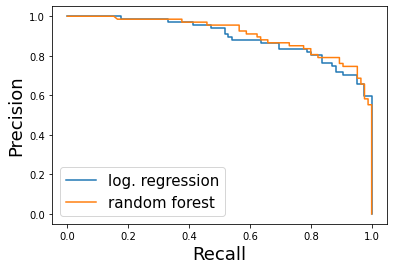

In [11]:
from sklearn.metrics import roc_curve

y_pred_prob_lr = lr.predict_proba(X_test) # predicted probabilities
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr[:,1])

y_pred_prob_rf = rf.predict_proba(X_test) # predicted probabilities
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf[:,1])

plt.plot(tpr_lr, 1-fpr_lr, label="log. regression")
plt.plot(tpr_rf, 1-fpr_rf, label="random forest")

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18);
plt.legend(fontsize=15)

plt.savefig("03_ml_basics_log_regr_heart_disease.pdf")

In [12]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test,y_pred_lr)
auc_rf = roc_auc_score(y_test,y_pred_rf)
print(f"Area under Curve (AUC) scores: {auc_lr:.2f}, {auc_rf:.2f}")

Area under Curve (AUC) scores: 0.81, 0.82
